### CS 457 - Homework Assignment 13: NLP
### Shahzaib Amir (sa05578)
### Email Address: sa05578@st.habib.edu.pk

In [166]:
import nltk
import tika
nltk.download('averaged_perceptron_tagger')
nltk.download('punkt')
nltk.download('stopwords')
from nltk import pos_tag, word_tokenize, RegexpParser
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from rake_nltk import Rake
import yake
import spacy
import matplotlib.pyplot as plt
from spacy import displacy
from collections import Counter
import en_core_web_sm
from bs4 import BeautifulSoup
from tika import parser
import requests
import re
import numpy as np
import tweepy as tw
import seaborn as sns 
import json
import pandas as pd
from textblob import TextBlob

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\Shahzaib Amir\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package punkt to C:\Users\Shahzaib
[nltk_data]     Amir\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to C:\Users\Shahzaib
[nltk_data]     Amir\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


### 1. Select any article on the website of your interest and perform Name Entity Relation(NER) analysis on it. Show all the necessary output and visualization and explain your findings. Also mention if you see any shortcoming or error in the algorithm output.

In [104]:
nlp = spacy.load('en_core_web_sm')

In [105]:
def url_to_string(url):
    res = requests.get(url)
    html = res.text
    soup = BeautifulSoup(html, 'html.parser')
    for script in soup(["script", "style", 'aside']):
        script.extract()
        return " ".join(re.split(r'[\n\t]+', soup.get_text()))

In [106]:
ny_bb = url_to_string('https://tribune.com.pk/story/2316594/auto-industry-to-usher-in-growth')
article = nlp(ny_bb)
len(article.ents)

197

In [107]:
labels = [x.label_ for x in article.ents]
Counter(labels)

Counter({'NORP': 27,
         'GPE': 52,
         'ORG': 41,
         'CARDINAL': 12,
         'DATE': 6,
         'WORK_OF_ART': 4,
         'PRODUCT': 6,
         'TIME': 1,
         'PERSON': 40,
         'ORDINAL': 1,
         'FAC': 2,
         'LAW': 5})

The categories or the broader terms which the article covers are mentioned in the variable label, with its count. The greater the count, the greater the importance of the topic that is being discussed in the article.

In [108]:
items = [x.text for x in article.ents]
Counter(items).most_common(3)

[('Pakistan', 25), ('China', 12), ('Chinese', 9)]

Most commonly used words in the article are mentioned above. The most frequent use is of the word, "Pakistan", which means the articles is discussing things on a national and internation level (since there is China mentioned too).

In [109]:
sentences = [x for x in article.sents]
print(sentences[20])


“The current situation of Pakistan’s automobile industry is very similar to that of China in the early 1990s, and its consumer market is about to take off.”


A sentence from the article extracted above. It shows that the article is about Pakistan's automobile industry.

In [110]:
displacy.render(nlp(str(sentences[20])), jupyter=True, style='ent')

In [111]:
dict([(str(x), x.label_) for x in nlp(str(sentences[20])).ents])

{'Pakistan': 'GPE', 'China': 'GPE', 'the early 1990s': 'DATE'}

In [112]:
[(x.orth_,x.pos_, x.lemma_) for x in [y for y in nlp(str(sentences[20])) if not y.is_stop and y.pos_ != 'PUNCT']]

[('current', 'ADJ', 'current'),
 ('situation', 'NOUN', 'situation'),
 ('Pakistan', 'PROPN', 'Pakistan'),
 ('automobile', 'NOUN', 'automobile'),
 ('industry', 'NOUN', 'industry'),
 ('similar', 'ADJ', 'similar'),
 ('China', 'PROPN', 'China'),
 ('early', 'ADJ', 'early'),
 ('1990s', 'NOUN', '1990'),
 ('consumer', 'NOUN', 'consumer'),
 ('market', 'NOUN', 'market')]

In [113]:
displacy.render(nlp(str(sentences)), jupyter=True, style='ent')

The only thing I did not find good in the algorithm is that it considered all of the text in the article and not only the relevant information, for example the algorithm also read the recommended blogs to be read or the other news rather than only considering the text about the automobile industry in Pakistan's data.

### 2. Select any research paper of your interest and perform word frequency and keyword extraction analysis. Use at least 3 different techniques/libraries. Show all the necessary output and visualization and explain your findings. Compare different techniques and mention if you see any shortcoming or error in the algorithm output.

In [114]:
tika.initVM()
raw = parser.from_file('ArtificialIntelligence.pdf')
# print(raw['content'])

In [115]:
tokenize_words = nltk.tokenize.word_tokenize(raw['content'])
stopwords = nltk.corpus.stopwords.words('english')
stopwords.extend(["T", "J", "D", "S", "M", "H", "et al", "et", "pp", "a.", "m.", "d.", "j.", "s.", "r.", "c.", "t."])
no_stopwords = [word for word in tokenize_words if word.lower() not in stopwords]

# remove punctuation, count raw words
nonPunct = re.compile('.*[A-Za-z].*')
clean_words = [w for w in no_stopwords if nonPunct.match(w)]
    
filtered_word_freq = nltk.FreqDist(clean_words)

In [116]:
filtered_word_freq.most_common(30)

[('AI', 32),
 ('Artificial', 25),
 ('Intelligence', 20),
 ('3D', 20),
 ('https', 19),
 ('Retrieved', 13),
 ('November', 13),
 ('ARTIFICIAL', 12),
 ('INTELLIGENCE', 11),
 ('enrichId=rgreq-a2aad98b6c3f30a89e32b9ef4100afb6-XXX', 10),
 ('enrichSource=Y292ZXJQYWdlOzMyMzQ5ODE1NjtBUzo2MDEyNzYyMTE1NTYzNTJAMTUyMDM2NjgyODk1Mw',
  10),
 ('_esc=publicationCoverPdf', 10),
 ('used', 8),
 ('Siri', 8),
 ('able', 7),
 ('machines', 7),
 ('like', 7),
 ('n.d.', 7),
 ('data', 7),
 ('Algorithm', 6),
 ('based', 6),
 ('figure', 6),
 ('learning', 5),
 ('models', 5),
 ('Figure', 5),
 ('Describes', 5),
 ('using', 5),
 ('module', 5),
 ('http', 5),
 ('publication', 4)]

Because the research paper contains a large number of recommended links, it is mentioned in the word frquency.

Most Common Tokens in our Research paper plotted below:

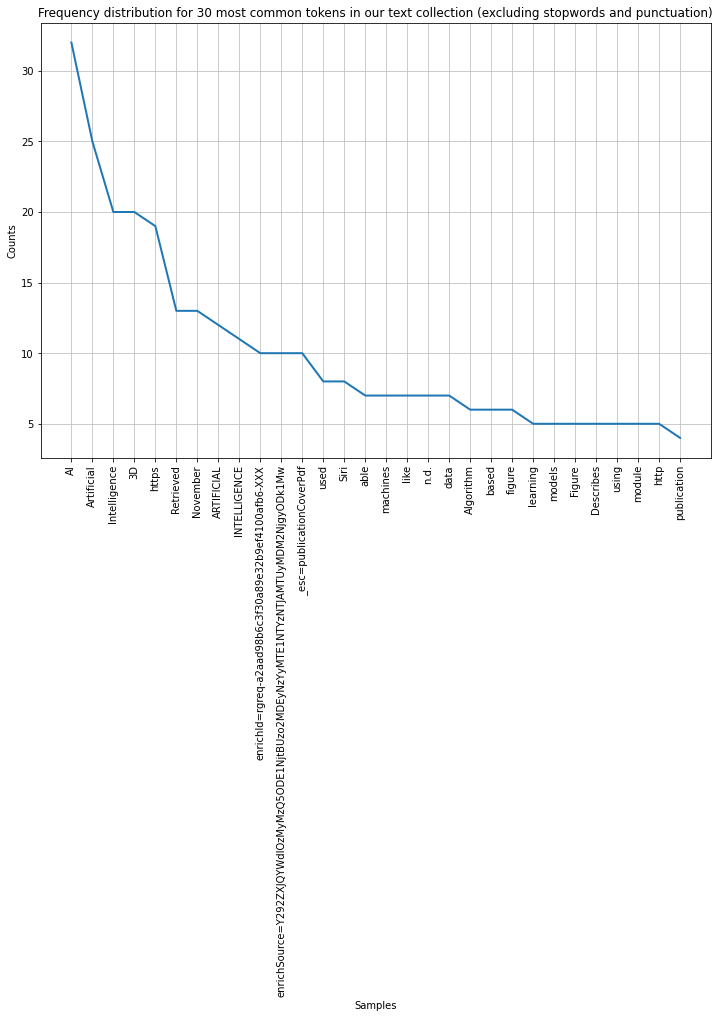

<AxesSubplot:title={'center':'Frequency distribution for 30 most common tokens in our text collection (excluding stopwords and punctuation)'}, xlabel='Samples', ylabel='Counts'>

In [117]:
filtered_word_freq.plot(30, title='Frequency distribution for 30 most common tokens in our text collection (excluding stopwords and punctuation)')

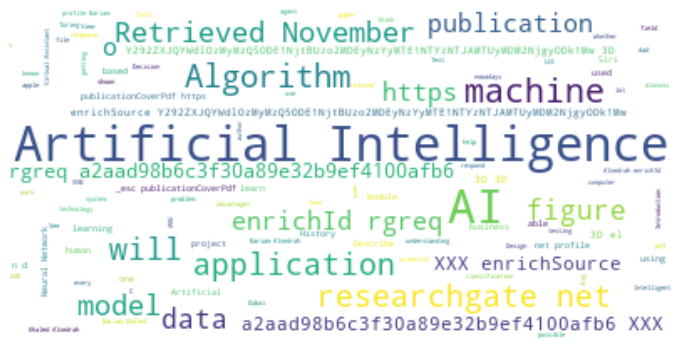

In [118]:
# lower max_font_size, change the maximum number of word and lighten the background:
plt.rcParams['figure.figsize'] = [12, 8]
wordcloud = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(raw['content'])
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()



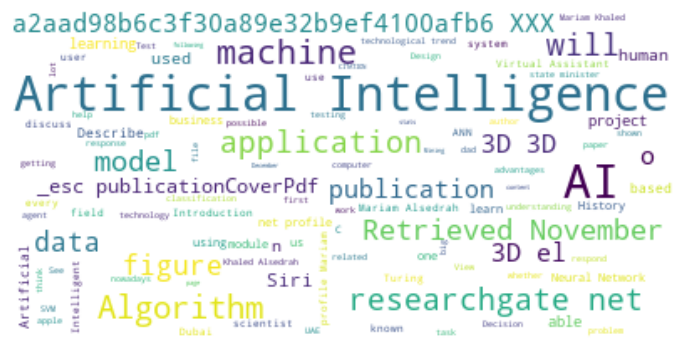

In [119]:
# Create stopword list:
stopwords = set(STOPWORDS)
stopwords.update(["T", "J", "D", "S", "M", "H", "et al", "et", "al", "https", "enrichId", "enrichSource", 
"Y292ZXJQYWdlOzMyMzQ5ODE1NjtBUzo2MDEyNzYyMTE1NTYzNTJAMTUyMDM2NjgyODk1Mw", "rgreq", "a2aad98b6c3f30a89e32b9ef4100afb6-XXX", 
"_esc publicationCoverPdf"])

# Generate a word cloud image
wordcloud = WordCloud(stopwords=stopwords, max_font_size=50, max_words=100, background_color="white").generate(raw['content'])

# Display the generated image:
# the matplotlib way:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

### RAKE Library for Text Summarization (Topic Modeling)

In [120]:
r = Rake()
r.extract_keywords_from_text(raw['content'])
r.get_ranked_phrases_with_scores()[:10]

[(81.19703804966963,
  '5 describes proposed conversational agent architecture artificial intelligence 10 references artificial intelligence technology'),
 (74.89751461988303,
  'future /# 30b20565128e view publication statsview publication stats https :// www'),
 (66.39267486899065,
  'artificial intelligence view project data mining view project mariam khaled alsedrah'),
 (65.74550264550265, '.” (“ yoa ”, 2017 )) ai design models ai application'),
 (55.486614262930054,
  'u1 mariam khaled alsedrah 24985 artificial intelligence 2 table'),
 (51.08354598617757,
  'references .......................................................................................................................... 10 artificial intelligence 3 artificial intelligence introduction'),
 (47.089101541733115,
  'developing artificial intelligence artificial intelligence 8 siri virtual assistant'),
 (45.17973595605174,
  '323498156 artificial intelligence research · december 2017 doi'),
 (44.888888888888886, 'mi

The key words with the highest scores above show the relevance or describe about the topic of the research paper, which is about Artificial Intelligence. This model recognized the topic of the research paper and identified the gist of the research paper and in addition to this, is easy to understand.

### Spacy Library for Text Summarization (Topic Modeling)

In [121]:
nlp = spacy.load('en_core_web_sm')
doc2 = nlp(raw['content'])
print(doc2.ents)

(December 2017, 10.13140, 1, 140,072, 1, Mariam Khaled Alsedrah

, The American University of the Middle East, 3, PUBLICATIONS, Mariam Khaled Alsedrah, 06 March 2018, https://www.researchgate.net/publication/323498156_Artificial_Intelligence?enrichId=rgreq-a2aad98b6c3f30a89e32b9ef4100afb6-XXX&enrichSource=Y292ZXJQYWdlOzMyMzQ5ODE1NjtBUzo2MDEyNzYyMTE1NTYzNTJAMTUyMDM2NjgyODk1Mw%3D%3D&el=1_x_3&_esc=publicationCoverPdf, 380, Hiba Tabbarah, Abdullah, Mariam Khaled AlSedrah, 24985, 3, 2, A.I.  ....................................................................................................................., 3, 3, 3, 4, 4, 5, AI Algorithm, Models, 5, 6, AI, 6  

, AI Design Models, 7, 8, 9, 9, 10, 3, one, these days, AI (Artificial Intelligent, AI, AI, John McCarthy, 1956, first, Alan Turing, Alan Turing, Smith, n.d., A.I., every day, AI, first, 2020, 85%, Gartner, n.d., Siri, AI, AI, Dubai, Pros, Cons of Artificial Intelligence, cost- effectiveness, AI, AI, One, AI, AI, Sadek”,(n.d, Artifi

This model is difficult to comprehend because the numbers next to the key words extracted from the spacy model do not specify what they represent; are they the count or importance level of a word in the research paper?


### Yake Library for Text Summarization (Topic Modeling)

In [122]:
kw_extractor = yake.KeywordExtractor()
language = "en"
max_ngram_size = 3
deduplication_threshold = 0.9
numOfKeywords = 20
custom_kw_extractor = yake.KeywordExtractor(lan=language, n=max_ngram_size, dedupLim=deduplication_threshold, top=numOfKeywords, features=None)
keywords = custom_kw_extractor.extract_keywords(raw['content'])
for kw in keywords:
    print(kw)

('Artificial Intelligence', 0.000695558944767796)
('Artificial Intelligence Artificial', 0.0016380938691537802)
('Artificial Intelligence Research', 0.0017042755071847197)
('Intelligence Artificial Intelligence', 0.0019550266672447286)
('Mariam Khaled Alsedrah', 0.0034780092529401014)
('Artificial', 0.003528026267920767)
('Intelligence', 0.004941760043300915)
('Retrieved November', 0.005665230958317298)
('Siri ARTIFICIAL INTELLIGENCE', 0.008256224855504013)
('Artificial Intelligence Applications', 0.008259153781018456)
('Artificial Intelligence Advanced', 0.008313239603004036)
('Artificial Neural Network', 0.010685195272234018)
('Artificial Intelligence View', 0.010701046452998523)
('Intelligence Artificial', 0.011476722588668635)
('Intelligence Research', 0.012020430936815662)
('Mariam Khaled', 0.013165982306462818)
('Artificial Intelligence Introduction', 0.013358183500827294)
('Developing Artificial Intelligence', 0.014477870020845055)
('November', 0.014620103070394299)
('REFERENCES

This model is good too in keyword extraction and quite accurate as it clearly focuses on the research paper and mentions the key points discussed in the research paper.

### 3. Choose any keyword of your interest and pull at least 1000 (tweets) from Twitter. 
### a. Clean the tweets and store them in csv file.
### b. Perform Sentiment Analysis on the tweet and show total positive and negative sentiment counts.
### c. Display one Positive and one Negative sentiment and discuss if the algorithm is accurate.
### d. Display the tweet with highest retweets and show its sentiment.
### e. Make a timeline visualization plot showing counts of positive and negative sentiments over the period of time.

In [123]:
#Part-1: Authorization and Search tweets
#Getting authorization
consumer_key = 'eR1zb853CsroHzovzLiJNPBK8'
consumer_key_secret = 'SMTGv6dLoAj81HAJ1q0I8DQ19pTTscdAINCXynLHdxb6tUDVjA'
access_token = '107436862-6ywCOzDd5bSHLZd3BWJ3buacPsL4OpWmhV5Lu9Uk'
access_token_secret = 'JAfDMXeg0OYz9ax8dELqvSlfX1sduHDVHnslVWwJjiJc2'
auth = tw.OAuthHandler(consumer_key, consumer_key_secret)
auth.set_access_token(access_token, access_token_secret)
api = tw.API(auth, wait_on_rate_limit=True)

In [189]:
# Create a custom search term and define the number of tweets
search_term = "#KarachiJalsa -filter:retweets"

tweets = tw.Cursor(api.search_tweets,
                   q=search_term,
                   lang="en",
                   since_id='2022-04-06').items(1000)

In [190]:
searched_tweets = [t for t in tweets]

In [191]:
#Part-3: Creating Dataframe of Tweets

#Cleaning searched tweets and converting into Dataframe
my_list_of_dicts = []
for each_json_tweet in searched_tweets:
    my_list_of_dicts.append(each_json_tweet._json)
    
with open('tweet_json_FM_Data.txt', 'w') as file:
        file.write(json.dumps(my_list_of_dicts, indent=4))
        
my_demo_list = []
with open('tweet_json_FM_Data.txt', encoding='utf-8') as json_file:  
    all_data = json.load(json_file)
    for each_dictionary in all_data:
        tweet_id = each_dictionary['id']
        text = each_dictionary['text']
        favorite_count = each_dictionary['favorite_count']
        retweet_count = each_dictionary['retweet_count']
        created_at = each_dictionary['created_at']
        my_demo_list.append({'tweet_id': str(tweet_id),
                             'text': str(text),
                             'favorite_count': int(favorite_count),
                             'retweet_count': int(retweet_count),
                             'created_at': created_at,
                            })
        
        tweet_dataset = pd.DataFrame(my_demo_list, columns = 
                                  ['tweet_id', 'text', 
                                   'favorite_count', 'retweet_count', 
                                   'created_at'])
    
#Writing tweet dataset ti csv file for future reference
tweet_dataset.to_csv('tweet_data_FM.csv',index=False)

For cleaning tweets

In [192]:
def remove_url(txt):
    #Replace URLs found in a text string with nothing
    return " ".join(re.sub("([^0-9A-Za-z \t])|(\w+:\/\/\S+)", "", txt).split())

In [193]:
#Removing @ handle
def remove_pattern(input_txt, pattern):
    r = re.findall(pattern, input_txt)
    for i in r:
        input_txt = re.sub(i, '', input_txt)
        
    return input_txt 

In [194]:
tweet_dataset['text'] = np.vectorize(remove_url)(tweet_dataset['text'])

In [195]:
tweet_dataset['text'] = np.vectorize(remove_pattern)(tweet_dataset['text'], "@[\w]*")

In [196]:
#Writing tweet dataset ti csv file for future reference
tweet_dataset.to_csv('tweet_data_clean_FM.csv',index=False)

In [197]:
tweet_dataset = pd.read_csv('tweet_data_clean_FM.csv')

Determining Sentiment of the tweet

In [198]:
def tweet_sentiment(txt):
    analysis = TextBlob(txt)
    if analysis.sentiment[0]>=0:
       res = 'positive'
    else:
       res= 'negative'
    return(res)

Positive Sentiment Tweets

In [209]:
tweet_dataset['sentiment'] = np.vectorize(tweet_sentiment)(tweet_dataset['text'].astype(str))
tweet_dataset[tweet_dataset['sentiment'] == 'positive']['text']

0      Power show of PTI KarachiJalsa ImportedGovtNot...
1      Showbiz personalities Syra Yousuf and Feroze K...
2         Bajwa SupremeCourtofpakistanKarachiJalsaLahore
3      Imran Khan is not just ruler but our leader He...
4      Heart touching just listen this I never saw a ...
                             ...                        
994    AbdullahBabarPK BabarAwanPK Death is always mo...
995    SyedNasirHShah Death is always mourned in larg...
996    amazon alexa99 Next3 offers file manager that ...
997    BasharatAliPPP SKhursheedShah BBhuttoZardari S...
998    No Doubt Karachi showed great support for Khan...
Name: text, Length: 913, dtype: object

Negative Sentiment Tweet

In [211]:
tweet_dataset['sentiment'] = np.vectorize(tweet_sentiment)(tweet_dataset['text'].astype(str))
tweet_dataset[tweet_dataset['sentiment'] == 'negative']['text']

14     Nation demands Supreme Court to Open Court on ...
17                      Sad Reality Karachi KarachiJalsa
26     Stand up for imrankhanPTI its alarming situati...
30     Ufff this brought tears to my eyes Mere Rasul ...
32     PTIofficial Ufff this brought tears to my eyes...
                             ...                        
916    Touts of foreign forces are up in arms as to w...
921    My life is not important your freedom is says ...
929    CMShehbaz We reject you money launderer Shehba...
938    Reportedly 50 to 60 bikes and few cars had bee...
999    This nation is now wide awake listening and fo...
Name: text, Length: 87, dtype: object

The algorithm is not so quite accurate as it can be seen that there are still some positive sentiments shown in the tweets, even though I queried for negative sentiments.

In [212]:
tweet_dataset.head(20)

tweet_id                                               text  \
0   1515740566486724622  Power show of PTI KarachiJalsa ImportedGovtNot...   
1   1515740533452378124  Showbiz personalities Syra Yousuf and Feroze K...   
2   1515740490271973382     Bajwa SupremeCourtofpakistanKarachiJalsaLahore   
3   1515740285753565189  Imran Khan is not just ruler but our leader He...   
4   1515740233148825600  Heart touching just listen this I never saw a ...   
5   1515740204082286592  Trend is still on 915april 349M 3crore 49 lac ...   
6   1515740063950417926          PROUD OF MY NATION HERO COAS KarachiJalsa   
7   1515739939140472835  Trust metoday karachities came up with really ...   
8   1515739934656712705  Picture worth a thousand words Simply iconicKa...   
9   1515739916738744334  KarachiJalsaOver 1 Billion Rupees Donated by P...   
10  1515739827009957898                 Captain Arzoo Spotted KarachiJalsa   
11  1515739546268442627  Feeling proud to cover ImranKhanPTI entry mome...   
12  1515739545588936719  Bajwa warns conspirators saying Army draws its...   
13  1515739357902123013  COAS said Hopefully we are moving towards the ...   
14  1515739290948493317  Nation demands Supreme Court to Open Court on ...   
15  1515739228424052736  Replaying video clips from KarachiJalsaShukriy...   
16  1515739055643836421  Over 1 Billion Rupees Donated by Pakistanis in...   
17  1515738817159909381                   Sad Reality Karachi KarachiJalsa   
18  1515738816174182411  17 April 2022 Updates 1 Deadlock in formation ...   
19  1515738792543637511                     new style KarachiJalsa Karachi   

    favorite_count  retweet_count                      created_at sentiment  
0                1              0  Sun Apr 17 17:14:46 +0000 2022  positive  
1                0              0  Sun Apr 17 17:14:38 +0000 2022  positive  
2                0              0  Sun Apr 17 17:14:28 +0000 2022  positive  
3                2              4  Sun Apr 17 17:13:39 +0000 2022  positive  
4                0              0  Sun Apr 17 17:13:27 +0000 2022  positive  
5                2              4  Sun Apr 17 17:13:20 +0000 2022  positive  
6                1              0  Sun Apr 17 17:12:46 +0000 2022  positive  
7                0              0  Sun Apr 17 17:12:17 +0000 2022  positive  
8               54             15  Sun Apr 17 17:12:16 +0000 2022  positive  
9                0              0  Sun Apr 17 17:12:11 +0000 2022  positive  
10               0              0  Sun Apr 17 17:11:50 +0000 2022  positive  
11               0              0  Sun Apr 17 17:10:43 +0000 2022  positive  
12               0              0  Sun Apr 17 17:10:43 +0000 2022  positive  
13               0              0  Sun Apr 17 17:09:58 +0000 2022  positive  
14               0              0  Sun Apr 17 17:09:42 +0000 2022  negative  
15               0              0  Sun Apr 17 17:09:27 +0000 2022  positive  
16               0              0  Sun Apr 17 17:08:46 +0000 2022  positive  
17               1              0  Sun Apr 17 17:07:49 +0000 2022  negative  
18               0              0  Sun Apr 17 17:07:49 +0000 2022  positive  
19               2              0  Sun Apr 17 17:07:43 +0000 2022  positive

In [213]:
max_retweets = tweet_dataset['retweet_count']
max_value = max_retweets.max()
print("Maximum number of retweets:", max_value)
max_tweet_senti = tweet_dataset[tweet_dataset['retweet_count'] == max_value]['sentiment']
max_tweet_text = tweet_dataset[tweet_dataset['retweet_count'] == max_value]['text']


print("Sentiment of the tweet with maximum retweets:", max_tweet_senti)
print("The text of the tweet with the maximum retweets:", max_tweet_text)

### It is printing tweet_id such as 47 below and I could not figure it out how to remove that 47.

Maximum number of retweets: 2552
Sentiment of the tweet with maximum retweets: 813    positive
Name: sentiment, dtype: object
The text of the tweet with the maximum retweets: 813    It takes a man of fierce determination burning...
Name: text, dtype: object


Displaying the sentiments below in the plot

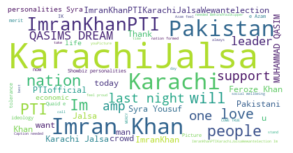

In [216]:
corpus = ' '.join(tweet_dataset.astype(str).text)
# Create stopword list:
stopwords = set(STOPWORDS)
# stopwords.update(["T", "J", "D", "S", "M", "H", "et al"])

# Generate a word cloud image
wordcloud = WordCloud(stopwords=stopwords, max_font_size=50, max_words=100, background_color="white").generate(corpus)

# Display the generated image:
# the matplotlib way:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

Timeline visualization plot showing counts of positive and negative sentiments with their counts over the period of time.

Bar-Graph Visualization

Total positive sentiments 913
Total negative sentiments 87


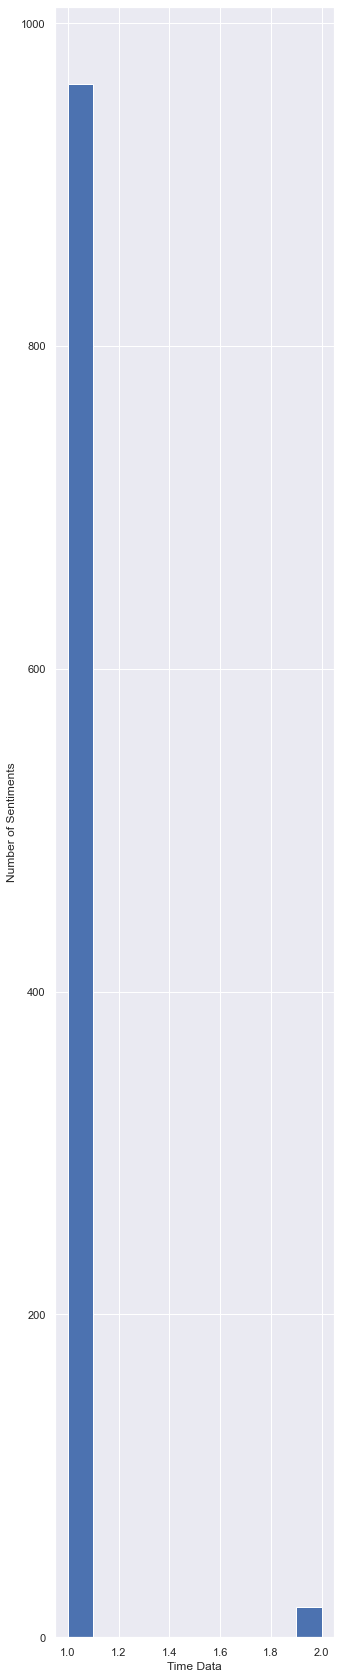

In [217]:
positive_counts = tweet_dataset['sentiment'].value_counts().positive
negative_counts = tweet_dataset['sentiment'].value_counts().negative
print("Total positive sentiments", positive_counts)
print("Total negative sentiments", negative_counts)


fig, ax2 = plt.subplots(1,1)
arr = np.array(list(tweet_dataset['created_at'].value_counts()))
plt.hist(arr)
ax2.set_xlabel('Time Data')
ax2.set_ylabel('Number of Sentiments')
plt.show()

Scatterplot Visualization

<AxesSubplot:xlabel='sentiment', ylabel='created_at'>

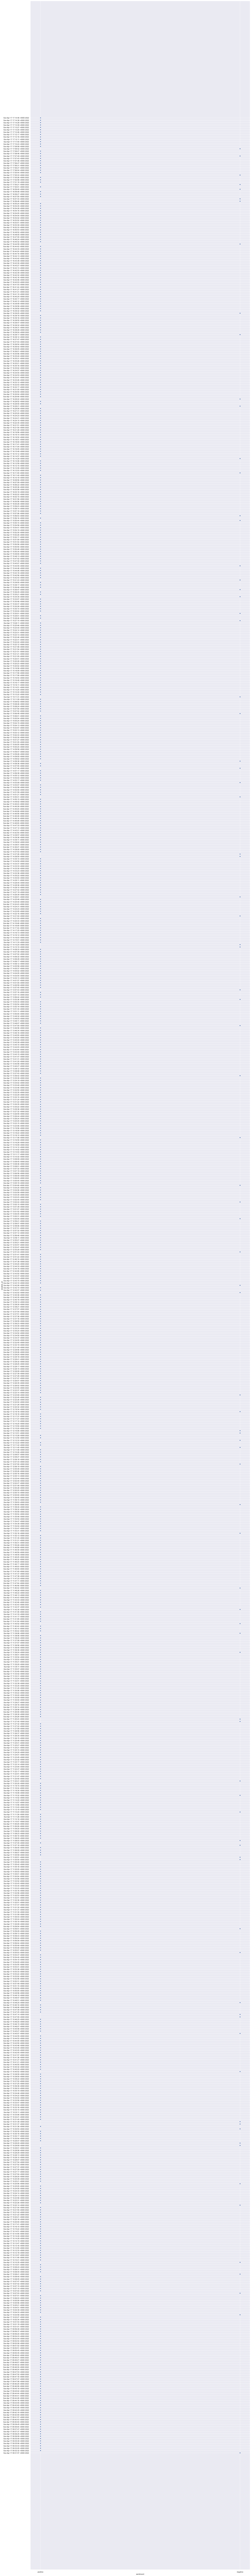

In [223]:
sns.set(rc = {'figure.figsize':(25, 250)})
sns.scatterplot(data = tweet_dataset, x="sentiment", y="created_at")

Seems like there has been more positive comments on Karachi Jalsa as searched on Twitter rather negative comments. (Also the count shown above is an evidence, where graph is just the depiction of those variables)